# Análise de dados - Enem 2019

# O que nos dizem os dados?

Carregamento dos dados disponíveis no arquivo MICRODADOS_ENEM_2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
import random
seed = 31123 # define o padrao de aleatoriedade
np.random.seed(seed)

total_linhas = sum(1 for l in open("MICRODADOS_ENEM_2019.csv",encoding="ISO-8859-1") )#conta quantas linhas tem o data set
print(f'Total de Linhas: {total_linhas}')

Total de Linhas: 5095271


In [3]:
# Leitura dos dados do arquivo MICRODADOS_ENEM_2019
p = 0.45 
tamanho = int(total_linhas*p)# calcula quanto é p% dos dados 
print(f'Total de Linhas para Estudo: {tamanho}')

index = random.sample(range(1, total_linhas), total_linhas - tamanho)# lista de numeros aleatorios

microdados_enem = pd.read_csv("MICRODADOS_ENEM_2019.csv",encoding="ISO-8859-1",delimiter=";",skiprows=index)


Total de Linhas para Estudo: 2292871


In [4]:
microdados_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
1,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
2,190001421548,2019,2924009,Paulo Afonso,29,BA,22.0,F,1,3,...,A,A,A,B,A,A,B,A,A,A
3,190001592264,2019,3550308,São Paulo,35,SP,20.0,F,1,1,...,B,A,A,B,A,A,B,B,A,A
4,190001592266,2019,3550308,São Paulo,35,SP,17.0,M,1,1,...,B,A,A,B,A,B,C,B,B,B


In [5]:
microdados_enem.drop_duplicates(keep = False, inplace = True)

In [6]:
microdados_enem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Os dados serão organizados de acordo com o estado onde o participante mora, em ordem alfabética dos estados, para se ter um contexto de avaliação do desempenho do aluno de acordo com a sua geolocalização.

In [7]:
sorted(microdados_enem['SG_UF_RESIDENCIA'].unique())

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

In [8]:
estudo1_microdados = pd.DataFrame(microdados_enem, columns = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006' ])

In [9]:
estudo1_microdados.isnull().sum()
estudo1_microdados.dropna(inplace=True)

In [10]:
estudo1_microdados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
1,190001237802,MG,22.0,F,1,1,4,1,1.0,0,513.6,575.5,570.7,677.0,860.0,G
2,190001421548,BA,22.0,F,3,1,5,1,1.0,0,484.6,488.4,507.2,594.7,600.0,B
4,190001592266,SP,17.0,M,1,2,0,2,1.0,0,543.9,548.1,502.5,480.7,400.0,F
6,190001475147,RN,19.0,M,4,1,1,1,1.0,0,518.2,351.7,417.6,459.0,500.0,C
17,190001237805,MG,22.0,F,1,1,5,1,1.0,0,560.0,592.0,591.1,695.1,540.0,G


In [11]:
estudo1_microdados.isnull().sum()

NU_INSCRICAO        0
SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_COR_RACA         0
TP_ST_CONCLUSAO     0
TP_ANO_CONCLUIU     0
TP_ESCOLA           0
TP_ENSINO           0
IN_TREINEIRO        0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
NU_NOTA_REDACAO     0
Q006                0
dtype: int64

In [12]:
estudo1_microdados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
1,190001237802,MG,22.0,F,1,1,4,1,1.0,0,513.6,575.5,570.7,677.0,860.0,G
2,190001421548,BA,22.0,F,3,1,5,1,1.0,0,484.6,488.4,507.2,594.7,600.0,B
4,190001592266,SP,17.0,M,1,2,0,2,1.0,0,543.9,548.1,502.5,480.7,400.0,F
6,190001475147,RN,19.0,M,4,1,1,1,1.0,0,518.2,351.7,417.6,459.0,500.0,C
17,190001237805,MG,22.0,F,1,1,5,1,1.0,0,560.0,592.0,591.1,695.1,540.0,G


In [13]:
estudo1_microdados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953878 entries, 1 to 2292865
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NU_INSCRICAO      953878 non-null  int64  
 1   SG_UF_RESIDENCIA  953878 non-null  object 
 2   NU_IDADE          953878 non-null  float64
 3   TP_SEXO           953878 non-null  object 
 4   TP_COR_RACA       953878 non-null  int64  
 5   TP_ST_CONCLUSAO   953878 non-null  int64  
 6   TP_ANO_CONCLUIU   953878 non-null  int64  
 7   TP_ESCOLA         953878 non-null  int64  
 8   TP_ENSINO         953878 non-null  float64
 9   IN_TREINEIRO      953878 non-null  int64  
 10  NU_NOTA_CN        953878 non-null  float64
 11  NU_NOTA_CH        953878 non-null  float64
 12  NU_NOTA_LC        953878 non-null  float64
 13  NU_NOTA_MT        953878 non-null  float64
 14  NU_NOTA_REDACAO   953878 non-null  float64
 15  Q006              953878 non-null  object 
dtypes: float64(7), int6

In [14]:
enem_df = estudo1_microdados

In [15]:
# Para construção do gráfico relacionando total de participantes com os estados brasileiros
candidados_por_estado = enem_df['SG_UF_RESIDENCIA'].value_counts().to_frame()
candidados_por_estado.reset_index(inplace=True)
candidados_por_estado = candidados_por_estado.rename(columns = {'index':'UF','SG_UF_RESIDENCIA':'TOTAL_PARTICIPANTS'})
candidados_por_estado.head()

,UF,TOTAL_PARTICIPANTS
0,SP,148015
1,MG,96494
2,BA,81065
3,CE,65742
4,PA,58519


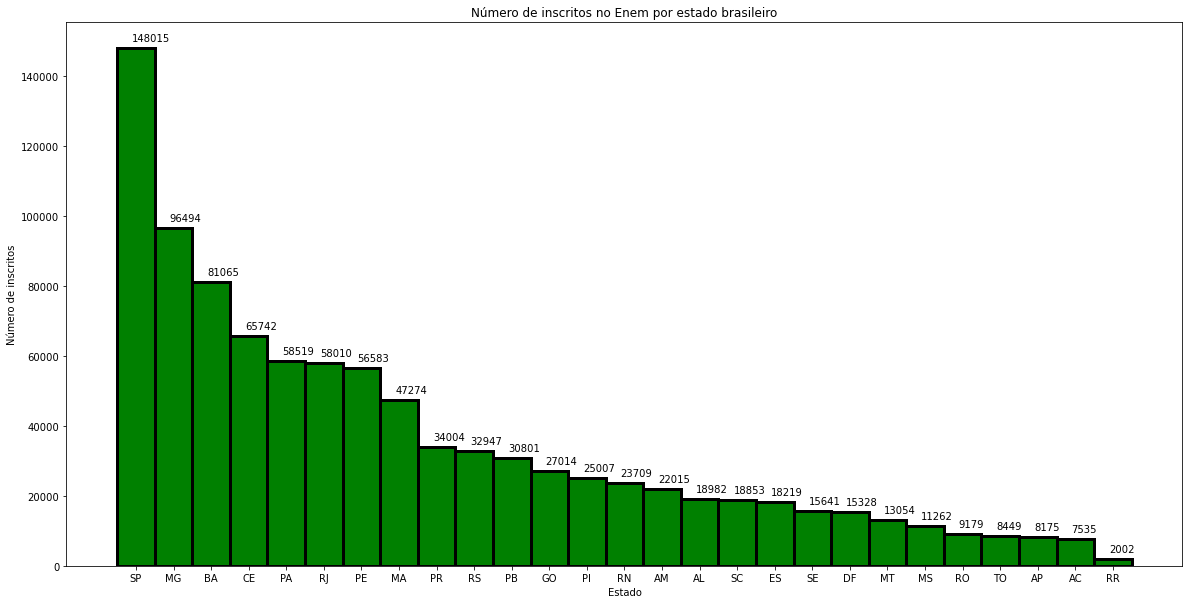

In [16]:
# Criação de um gráfico de barras para visualização da quantidade de inscritos por estado
num_inscritos = candidados_por_estado['TOTAL_PARTICIPANTS']
estado = candidados_por_estado['UF']
plt.figure(figsize = (20,10))
plt.bar(estado, num_inscritos, width= 1, align='center', color='g', edgecolor = 'black', linewidth = '3')
plt.xticks(estado)
i = 1.0
j = 2000
# Annotating the bar plot with the values (total death count)
for i in range(len(estado)):
    plt.annotate(num_inscritos[i], (-0.1 + i, num_inscritos[i] + j))
plt.ylabel('Número de inscritos')
plt.xlabel('Estado')
plt.title('Número de inscritos no Enem por estado brasileiro')
plt.show()

Pelo gráfico de barras acima, pode-se observar que a maioria dos candidados inscritos no Enem 2019 foram dos estados de São Paulo, Minas Gerais e Bahia, logo, os dados correspondentes a esses três estados influenciam prodominantemente nos resultados das análises.

Estudo baseado nas notas das provas

In [17]:
estudo2_microdados = pd.DataFrame(enem_df, columns = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA','TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006' ])

In [18]:
estudo2_microdados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,G
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,B
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,F
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,C
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,G


In [19]:
estudo2_microdados.rename(columns={'NU_NOTA_CN': 'CIENCIAS_NATUREZA', 'NU_NOTA_CH': 'CIENCIAS_HUMANAS', 'NU_NOTA_LC': 'LINGUAGENS_CODIGOS', 'NU_NOTA_MT': 'MATEMATICA','NU_NOTA_REDACAO': 'REDACAO','Q006': 'RENDA',
                        },inplace=True)

In [20]:
estudo2_microdados.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO,RENDA
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,G
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,B
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,F
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,C
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,G
18,190001421552,BA,2,567.3,584.1,595.8,704.5,620.0,B
20,190001237806,MG,1,504.2,554.6,519.7,462.4,580.0,C
25,190001480443,PB,2,373.2,409.6,469.5,379.1,480.0,C
27,190002037440,DF,2,389.7,431.1,482.0,529.7,560.0,B
31,190001042835,PA,1,463.9,559.7,542.1,377.9,740.0,B


In [21]:
notas_enem = pd.DataFrame(estudo2_microdados, columns = ['CIENCIAS_NATUREZA', 'CIENCIAS_HUMANAS', 'LINGUAGENS_CODIGOS', 'MATEMATICA', 'REDACAO'])

In [22]:
notas_enem.head()

,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO
1,513.6,575.5,570.7,677.0,860.0
2,484.6,488.4,507.2,594.7,600.0
4,543.9,548.1,502.5,480.7,400.0
6,518.2,351.7,417.6,459.0,500.0
17,560.0,592.0,591.1,695.1,540.0


In [23]:
notas_enem.describe()

,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO
count,953878.000000,953878.000000,953878.000000,953878.000000,953878.000000
mean,471.154960,504.111415,518.310507,514.425074,580.692017
std,72.233556,77.908424,60.969581,102.992083,177.619281
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,414.500000,447.400000,482.600000,432.500000,500.000000
50%,463.700000,507.600000,523.700000,493.200000,580.000000
75%,523.100000,560.900000,561.000000,582.600000,680.000000
max,847.800000,835.100000,801.700000,985.000000,1000.000000


Pelos dados estatisticos apresentados acima, pode-se verificar que a única prova que atingiu a nota máxima (1000) foi a de redação, porém existiram pontuações próximas a máxima na prova de Matemática, que foi 985. Além disso, pode-se observar que a maior média entre as notas também é para a prova de redação, enquanto que a menor média ficou na prova de Ciências da Natureza. 

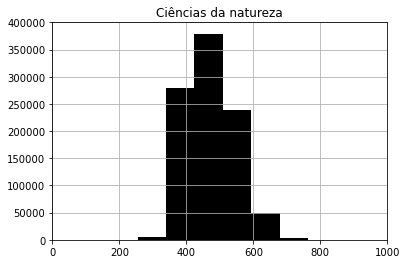

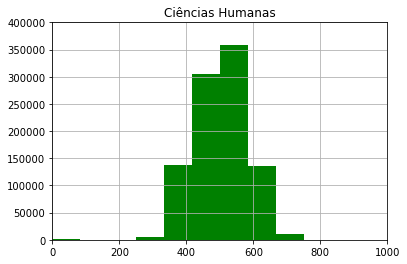

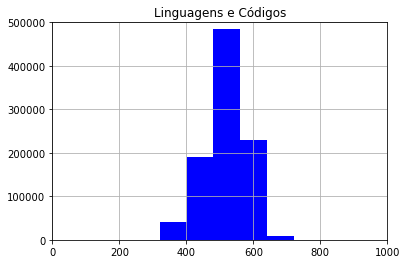

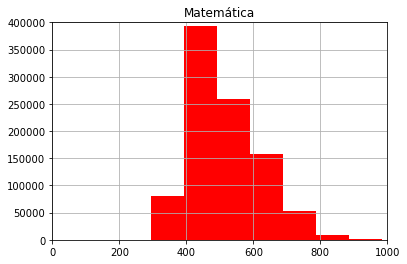

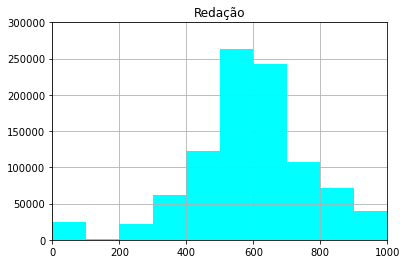

In [24]:
plt.subplot(1,1,1)
plt.hist(notas_enem['CIENCIAS_NATUREZA'], facecolor='black')
plt.title('Ciências da natureza')
plt.xlim(0, 1000)
plt.ylim(0, 400000)
plt.grid(True)
plt.show()
plt.subplot(1,1,1)
plt.hist(notas_enem['CIENCIAS_HUMANAS'], facecolor='g')
plt.title('Ciências Humanas')
plt.xlim(0, 1000)
plt.ylim(0, 400000)
plt.grid(True)
plt.show()
plt.subplot(1,1,1)
plt.hist(notas_enem['LINGUAGENS_CODIGOS'], facecolor='b')
plt.title('Linguagens e Códigos')
plt.xlim(0, 1000)
plt.ylim(0, 500000)
plt.grid(True)
plt.show()
plt.subplot(1,1,1)
plt.hist(notas_enem['MATEMATICA'], facecolor='r')
plt.title('Matemática')
plt.xlim(0, 1000)
plt.ylim(0, 400000)
plt.grid(True)
plt.show()
plt.subplot(1,1,1)
plt.hist(notas_enem['REDACAO'], facecolor='cyan')
plt.title('Redação')
plt.xlim(0, 1000)
plt.ylim(0, 300000)
plt.grid(True)
plt.show()

De um modo geral, o histograma acima nos mostra a distribuição das notas das 5 provas aplicadas no Enem de 2019 em relação aos candidatos que as fizeram. Quanto mais a direita o gráfico estiver posicionado, melhores são as pontuações dos participantes em cada uma das provas. Existe uma tendêndencia nos três primeiros gráficos em relação as notas medianas, entre o intervalo de 400 a 600. Já os dois ultimos gráficos, que correspondem as provas de Matemática e de Redação, as notas estão posicionadas em sua maioria à direita do gráfico, após o valor de 400 de pontuação na prova.

Comparativo entre as notas das provas do Enem em relação aos estados dos participantes

In [25]:
estudo2_microdados.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO,RENDA
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,G
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,B
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,F
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,C
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,G
18,190001421552,BA,2,567.3,584.1,595.8,704.5,620.0,B
20,190001237806,MG,1,504.2,554.6,519.7,462.4,580.0,C
25,190001480443,PB,2,373.2,409.6,469.5,379.1,480.0,C
27,190002037440,DF,2,389.7,431.1,482.0,529.7,560.0,B
31,190001042835,PA,1,463.9,559.7,542.1,377.9,740.0,B


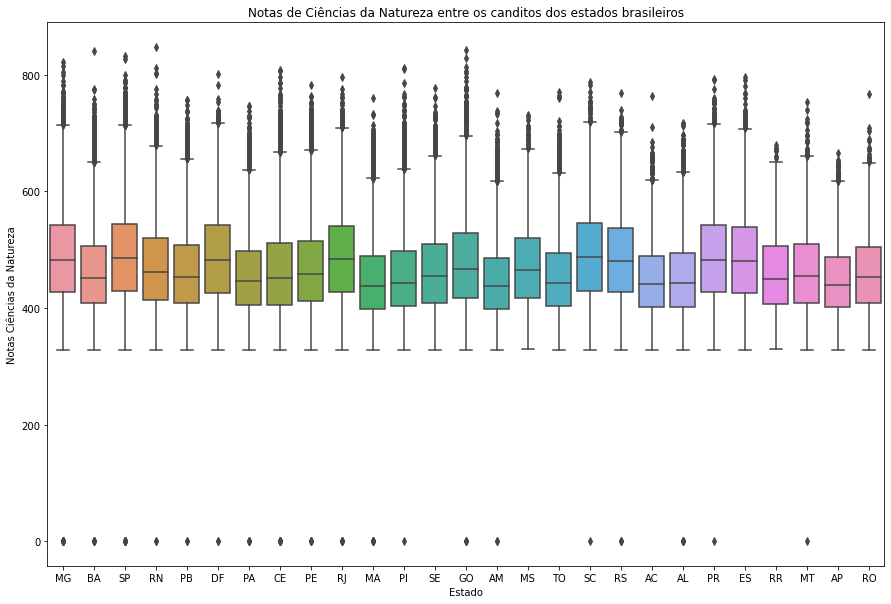

In [26]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.boxplot(x='SG_UF_RESIDENCIA', y='CIENCIAS_NATUREZA', data=estudo2_microdados) 
plt.ylabel('Notas Ciências da Natureza')
plt.xlabel('Estado')
plt.title('Notas de Ciências da Natureza entre os canditos dos estados brasileiros')
plt.show()

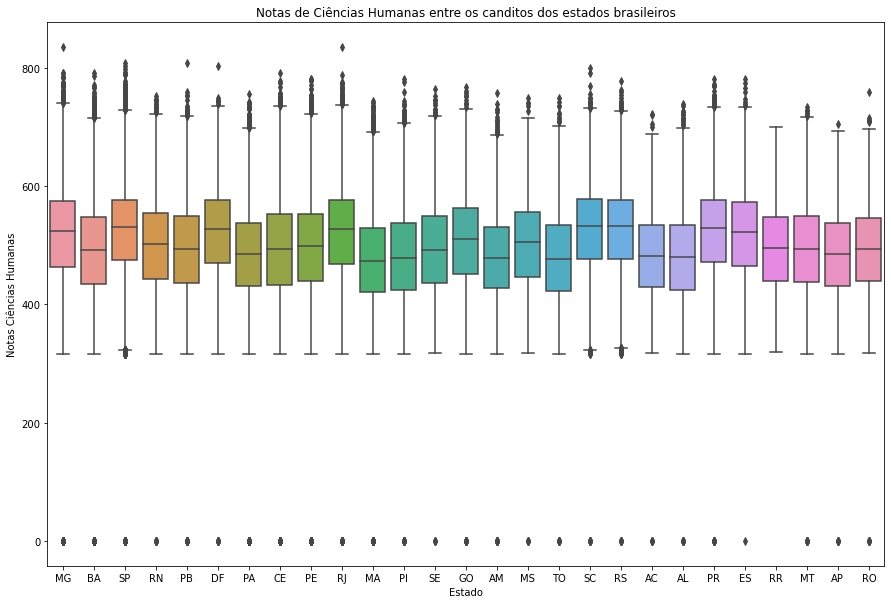

In [27]:
plt.figure(figsize = (15,10))
sns.boxplot(x='SG_UF_RESIDENCIA', y='CIENCIAS_HUMANAS', data=estudo2_microdados) 
plt.ylabel('Notas Ciências Humanas')
plt.xlabel('Estado')
plt.title('Notas de Ciências Humanas entre os canditos dos estados brasileiros')
plt.show()

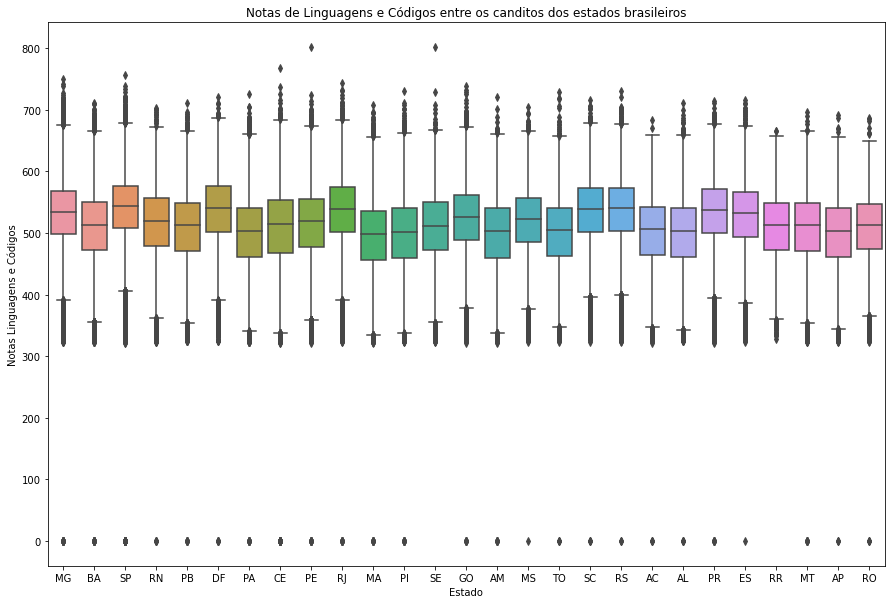

In [28]:
plt.figure(figsize = (15,10))
sns.boxplot(x='SG_UF_RESIDENCIA', y='LINGUAGENS_CODIGOS', data=estudo2_microdados) 
plt.ylabel('Notas Linguagens e Códigos')
plt.xlabel('Estado')
plt.title('Notas de Linguagens e Códigos entre os canditos dos estados brasileiros')
plt.show()

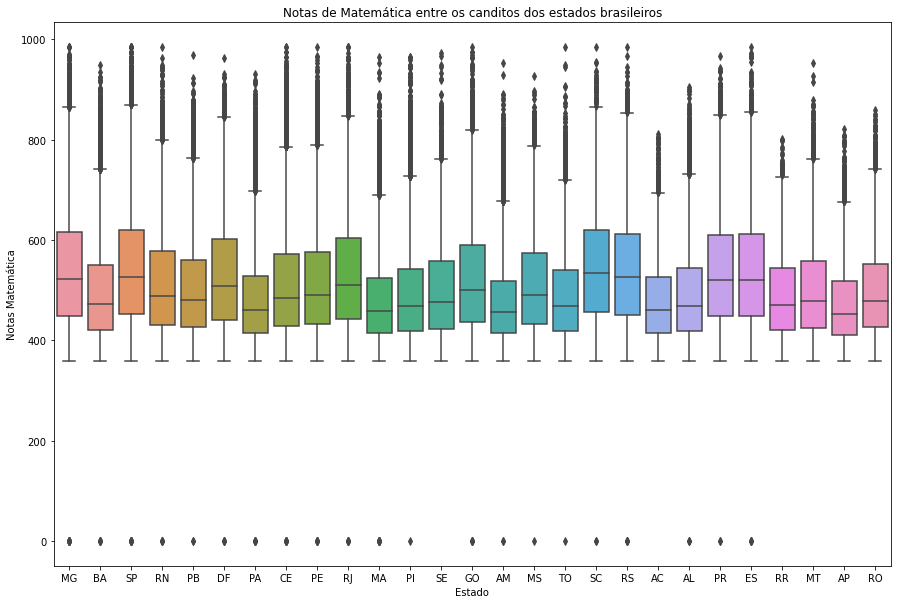

In [29]:
plt.figure(figsize = (15,10))
sns.boxplot(x='SG_UF_RESIDENCIA', y='MATEMATICA', data=estudo2_microdados) 
plt.ylabel('Notas Matemática')
plt.xlabel('Estado')
plt.title('Notas de Matemática entre os canditos dos estados brasileiros')
plt.show()

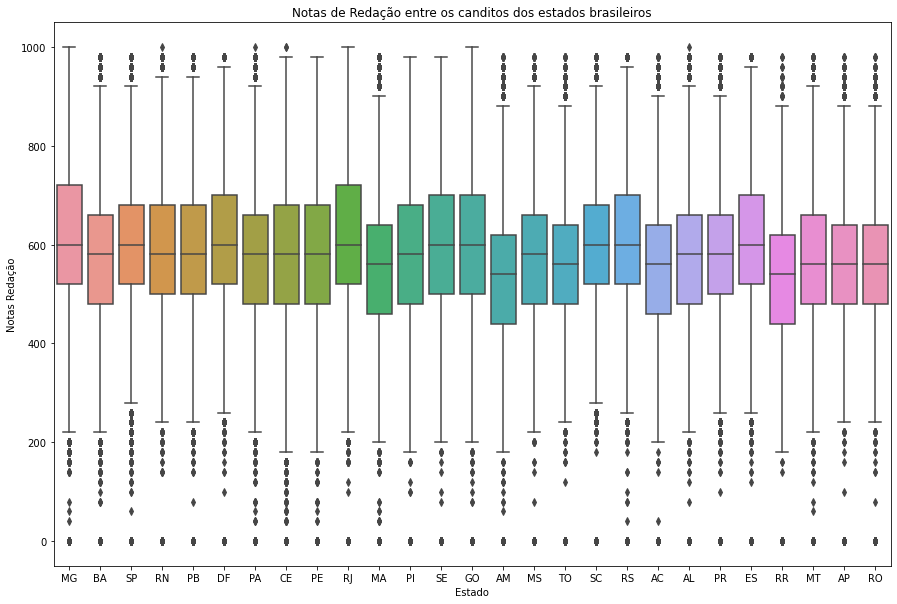

In [30]:
plt.figure(figsize = (15,10))
sns.boxplot(x='SG_UF_RESIDENCIA', y='REDACAO', data=estudo2_microdados) 
plt.ylabel('Notas Redação')
plt.xlabel('Estado')
plt.title('Notas de Redação entre os canditos dos estados brasileiros')
plt.show()

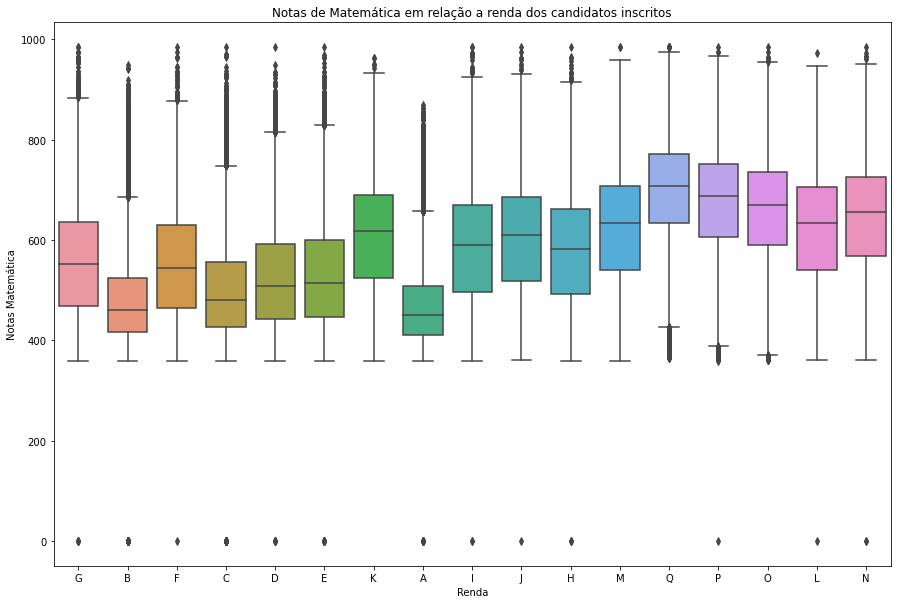

In [31]:
plt.figure(figsize = (15,10))
sns.boxplot(x='RENDA', y='MATEMATICA', data=estudo2_microdados) 
plt.ylabel('Notas Matemática')
plt.xlabel('Renda')
plt.title('Notas de Matemática em relação a renda dos candidatos inscritos')
plt.show()

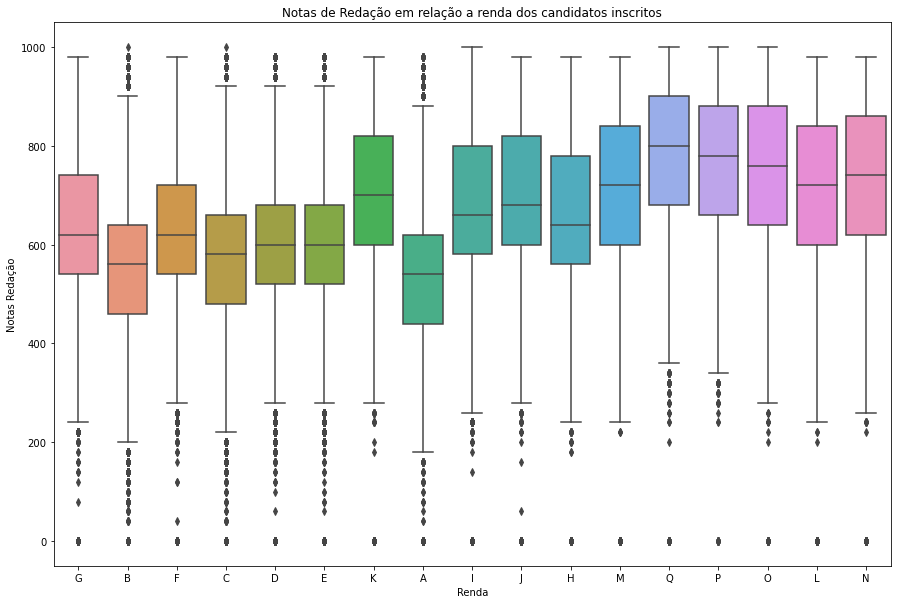

In [32]:
plt.figure(figsize = (15,10))
sns.boxplot(x='RENDA', y='REDACAO', data=estudo2_microdados) 
plt.ylabel('Notas Redação')
plt.xlabel('Renda')
plt.title('Notas de Redação em relação a renda dos candidatos inscritos')
plt.show()

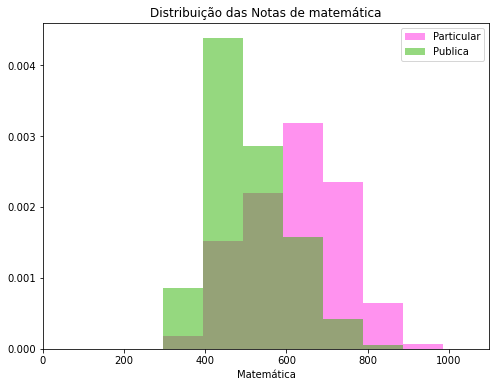

In [33]:
particular = estudo2_microdados[estudo2_microdados.TP_ESCOLA == 3]
publica = estudo2_microdados[estudo2_microdados.TP_ESCOLA == 2]
nota_particular = particular['MATEMATICA']
nota_publica = publica['MATEMATICA']
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de matemática')
plt.xlabel('Matemática')
plt.hist(nota_particular, alpha=0.5, label='Particular', color='#FF26E1', density=True)
plt.hist(nota_publica, alpha=0.5, label='Publica', color='#2DB200', density=True)
plt.legend(loc='upper right')

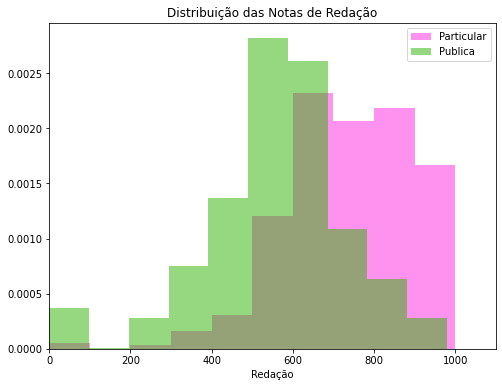

In [34]:
particular = estudo2_microdados[estudo2_microdados.TP_ESCOLA == 3]
publica = estudo2_microdados[estudo2_microdados.TP_ESCOLA == 2]
nota_particular = particular['REDACAO']
nota_publica = publica['REDACAO']
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de Redação')
plt.xlabel('Redação')
plt.hist(nota_particular, alpha=0.5, label='Particular', color='#FF26E1', density=True)
plt.hist(nota_publica, alpha=0.5, label='Publica', color='#2DB200', density=True)
plt.legend(loc='upper right')

In [35]:
estudo3_microdados = estudo2_microdados['RENDA'].replace(['A', 'B', 'C', 'D', 'E', 'F'], 1)
estudo3_microdados = estudo3_microdados.replace(['G', 'H', 'I', 'J', 'K', 'L'], 2)
estudo3_microdados = estudo3_microdados.replace(['M', 'N','O','P', 'Q'], 3)

In [36]:
estudo3_microdados.head(10)

1     2
2     1
4     1
6     1
17    2
18    1
20    1
25    1
27    1
31    1
Name: RENDA, dtype: int64

In [37]:
estudo2_microdados = estudo2_microdados.drop(["RENDA"], axis=1)
notas_classes = pd.concat((estudo2_microdados, estudo3_microdados, ), axis=1) 
#notas_classes = notas_classes.drop(columns=8) 
print(notas_classes) 

         NU_INSCRICAO SG_UF_RESIDENCIA  TP_ESCOLA  CIENCIAS_NATUREZA  \
1        190001237802               MG          1              513.6   
2        190001421548               BA          1              484.6   
4        190001592266               SP          2              543.9   
6        190001475147               RN          1              518.2   
17       190001237805               MG          1              560.0   
...               ...              ...        ...                ...   
2292854  190005771623               PA          1              519.9   
2292858  190005863624               SP          2              433.7   
2292859  190005539808               MA          1              364.1   
2292861  190005928993               PR          2              492.9   
2292865  190005863627               SP          2              370.3   

         CIENCIAS_HUMANAS  LINGUAGENS_CODIGOS  MATEMATICA  REDACAO  RENDA  
1                   575.5               570.7       677.0  

In [38]:
notas_classes = pd.DataFrame(notas_classes)
notas_classes

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO,RENDA
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,2
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,1
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,1
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,1
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,2
...,...,...,...,...,...,...,...,...,...
2292854,190005771623,PA,1,519.9,465.3,514.8,489.9,520.0,1
2292858,190005863624,SP,2,433.7,431.2,545.7,435.2,520.0,2
2292859,190005539808,MA,1,364.1,421.8,506.4,432.2,460.0,1
2292861,190005928993,PR,2,492.9,471.8,522.1,517.6,540.0,1


Estabelecendo uma comparação entre os dois gráficos de distribuição acima, é possível perceber que a maior parte das notas acima de 600 tanto na prova de Matemática quanto na prova de Redação corresponde aos candidatos que durante a inscrição para a prova do Enem inseriram a informação que vieram de escolas particulares. 

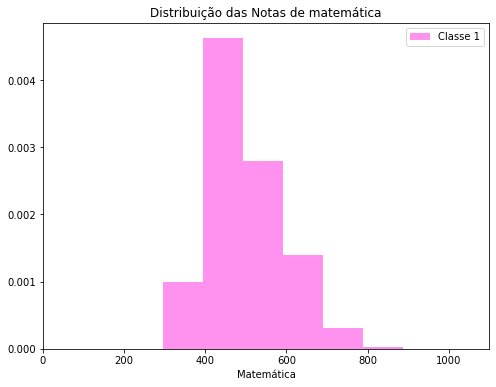

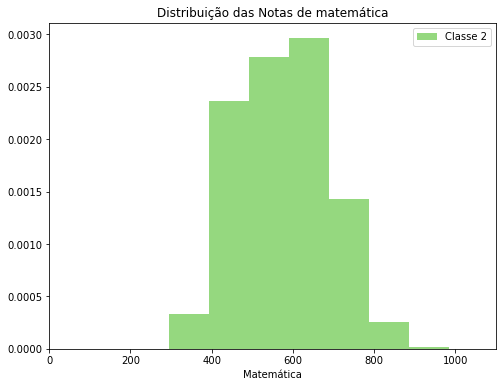

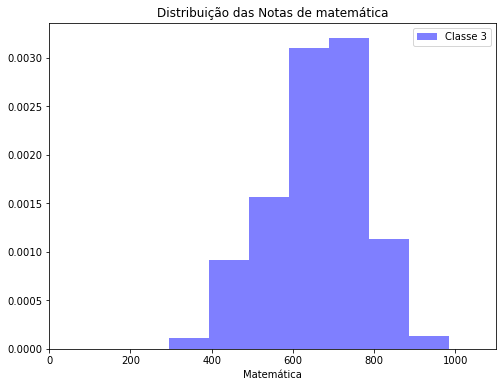

In [39]:
classe1 = notas_classes[notas_classes.RENDA == 1]
classe2 = notas_classes[notas_classes.RENDA == 2]
classe3 = notas_classes[notas_classes.RENDA == 3]
nota_classe1 = classe1['MATEMATICA']
nota_classe2 = classe2['MATEMATICA']
nota_classe3 = classe3['MATEMATICA']
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de matemática')
plt.xlabel('Matemática')
plt.hist(nota_classe1, alpha=0.5, label='Classe 1', color='#FF26E1', density=True)
plt.legend(loc='upper right')
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de matemática')
plt.xlabel('Matemática')
plt.hist(nota_classe2, alpha=0.5, label='Classe 2', color='#2DB200', density=True)
plt.legend(loc='upper right')
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de matemática')
plt.xlabel('Matemática')
plt.hist(nota_classe3, alpha=0.5, label='Classe 3', color='b', density=True)
plt.legend(loc='upper right')

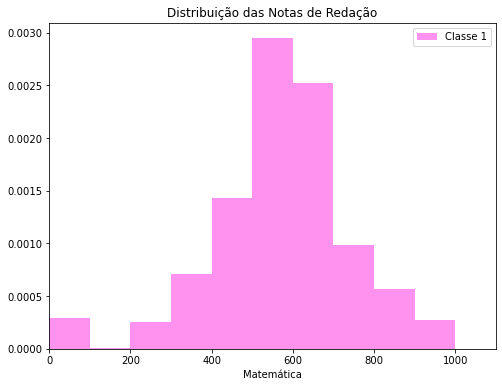

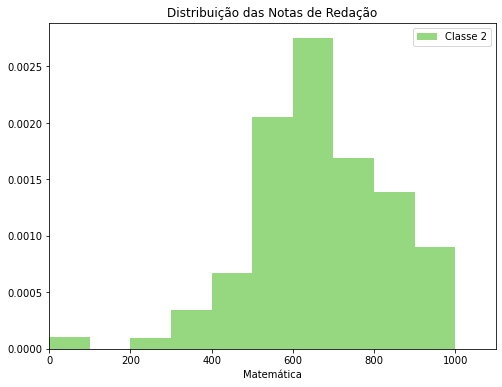

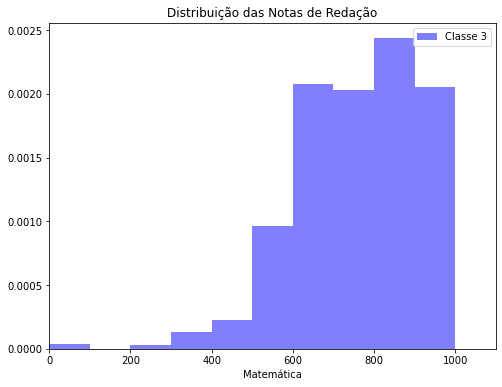

In [40]:
classe1 = notas_classes[notas_classes.RENDA == 1]
classe2 = notas_classes[notas_classes.RENDA == 2]
classe3 = notas_classes[notas_classes.RENDA == 3]
nota_classe1 = classe1['REDACAO']
nota_classe2 = classe2['REDACAO']
nota_classe3 = classe3['REDACAO']
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de Redação')
plt.xlabel('Matemática')
plt.hist(nota_classe1, alpha=0.5, label='Classe 1', color='#FF26E1', density=True)
plt.legend(loc='upper right')
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de Redação')
plt.xlabel('Matemática')
plt.hist(nota_classe2, alpha=0.5, label='Classe 2', color='#2DB200', density=True)
plt.legend(loc='upper right')
plt.figure(figsize=(8, 6))
plt.xlim(0, 1100)
plt.title('Distribuição das Notas de Redação')
plt.xlabel('Matemática')
plt.hist(nota_classe3, alpha=0.5, label='Classe 3', color='b', density=True)
plt.legend(loc='upper right')

In [41]:
notas_classes['NOTA_TOTAL'] = (notas_classes['REDACAO'] + notas_classes['CIENCIAS_HUMANAS'] + notas_classes['CIENCIAS_NATUREZA'] + notas_classes['LINGUAGENS_CODIGOS'] + notas_classes['MATEMATICA'])/5

In [42]:
notas_classes.head(20)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO,RENDA,NOTA_TOTAL
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,2,639.36
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,1,534.98
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,1,495.04
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,1,449.30
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,2,595.64
18,190001421552,BA,2,567.3,584.1,595.8,704.5,620.0,1,614.34
20,190001237806,MG,1,504.2,554.6,519.7,462.4,580.0,1,524.18
25,190001480443,PB,2,373.2,409.6,469.5,379.1,480.0,1,422.28
27,190002037440,DF,2,389.7,431.1,482.0,529.7,560.0,1,478.50
31,190001042835,PA,1,463.9,559.7,542.1,377.9,740.0,1,536.72


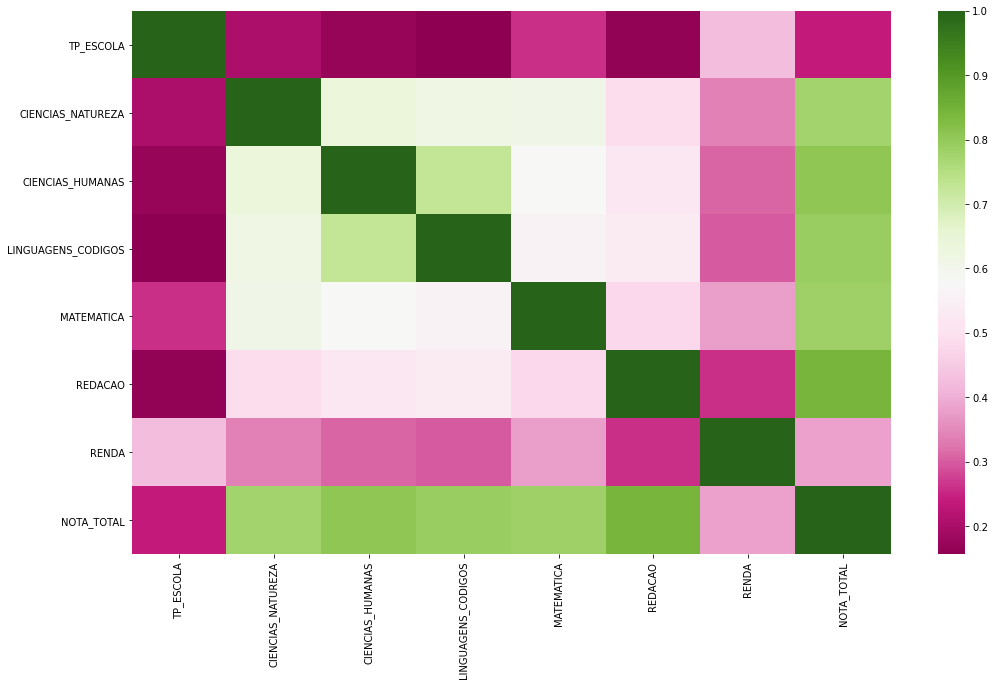

In [43]:
#relações entre notas e dados socieconomicos
plt.subplots(figsize=(17, 10))
sns.heatmap(notas_classes[['TP_ESCOLA','CIENCIAS_NATUREZA', 'CIENCIAS_HUMANAS', 'LINGUAGENS_CODIGOS', 'MATEMATICA', 'REDACAO', 'RENDA', 'NOTA_TOTAL']].corr(), cmap="PiYG")

Buscou-se estabelecer uma correlação entre a Renda e o Tipo de escola, que foi inserida pelo candidato durante a inscrição para a prova do Enem 2019, com a nota final obtida pelo candidato, porém verificou-se que existe pouca correlação entre as variáveis. Dessa forma, criou-se uma separação entre os candidatos que tiveram notas acima de 510 e os que ficaram abaixo desse valor. De modo a verificar se o aluno que ultrapassou esse valor tem relação a determinada Renda ou Tipo de escola.

In [44]:
def result_enem(row):
    if row['NOTA_TOTAL'] < 510:
        return 0
    else :
        return 1

In [45]:
notas_classes["RESULTADO"] = notas_classes.apply(result_enem, axis=1)

In [46]:
notas_classes.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,TP_ESCOLA,CIENCIAS_NATUREZA,CIENCIAS_HUMANAS,LINGUAGENS_CODIGOS,MATEMATICA,REDACAO,RENDA,NOTA_TOTAL,RESULTADO
1,190001237802,MG,1,513.6,575.5,570.7,677.0,860.0,2,639.36,1
2,190001421548,BA,1,484.6,488.4,507.2,594.7,600.0,1,534.98,1
4,190001592266,SP,2,543.9,548.1,502.5,480.7,400.0,1,495.04,0
6,190001475147,RN,1,518.2,351.7,417.6,459.0,500.0,1,449.30,0
17,190001237805,MG,1,560.0,592.0,591.1,695.1,540.0,2,595.64,1
18,190001421552,BA,2,567.3,584.1,595.8,704.5,620.0,1,614.34,1
20,190001237806,MG,1,504.2,554.6,519.7,462.4,580.0,1,524.18,1
25,190001480443,PB,2,373.2,409.6,469.5,379.1,480.0,1,422.28,0
27,190002037440,DF,2,389.7,431.1,482.0,529.7,560.0,1,478.50,0
31,190001042835,PA,1,463.9,559.7,542.1,377.9,740.0,1,536.72,1


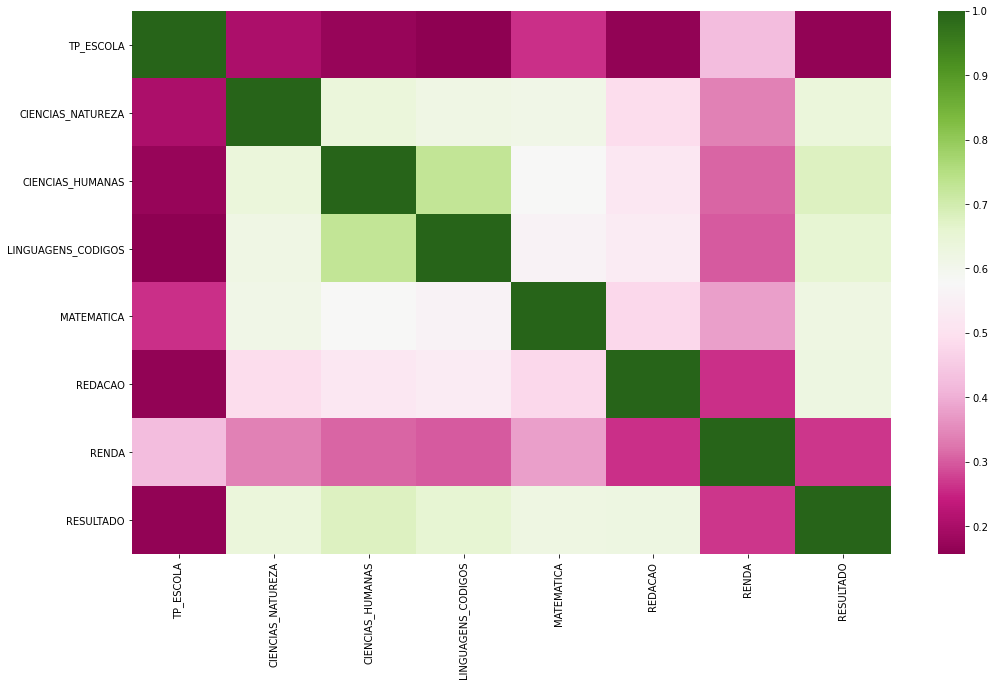

In [51]:
#relações entre notas e dados socieconomicos
plt.subplots(figsize=(17, 10))
sns.heatmap(notas_classes[['TP_ESCOLA','CIENCIAS_NATUREZA', 'CIENCIAS_HUMANAS', 'LINGUAGENS_CODIGOS', 'MATEMATICA', 'REDACAO', 'RENDA', 'RESULTADO']].corr(), cmap="PiYG")

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(notas_classes[['TP_ESCOLA', 'RENDA']], notas_classes['RESULTADO'], test_size=0.3)

In [48]:
#KNN (K-Nearest Neighbors )
from sklearn.neighbors import KNeighborsClassifier
# Definindo o número de vizinhos.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
#Para determinar a acurácia do modelo
result = knn.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.56      0.47      0.51    142033
           1       0.55      0.63      0.58    144131

    accuracy                           0.55    286164
   macro avg       0.55      0.55      0.55    286164
weighted avg       0.55      0.55      0.55    286164



In [50]:
#Random forest
#Importa a biblioteca
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
#Treina o modelo usando os dados de treino e confere o score
model.fit(X_train,y_train)
#Prevê o resultado e determina a acurácia do modelo
predicted= model.predict(X_test)
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.57      0.91      0.70    142033
           1       0.79      0.32      0.46    144131

    accuracy                           0.62    286164
   macro avg       0.68      0.62      0.58    286164
weighted avg       0.68      0.62      0.58    286164

